<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/22F8W2/MSDS%20686/Week_3/MNIST_Convets_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. Previously we gained about 98% accuracy in the model.  This time we will introduce convolutional neural networks, data augmentation, and transfer learning to improve the model. 

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train =  X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32')/X_train.max()

X_test =  X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32')/X_test.max()

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

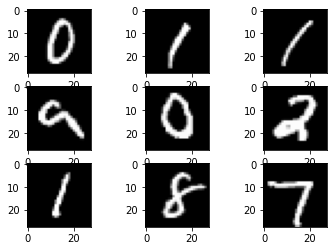

In [ ]:
for i in range(0, 9):
    plt.subplot(3, 3, + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
def CNN_Base():
  backend.clear_session()
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model

In [ ]:
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [ ]:
model = CNN_Base()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                        

In [ ]:
from tensorflow.keras.utils import plot_model

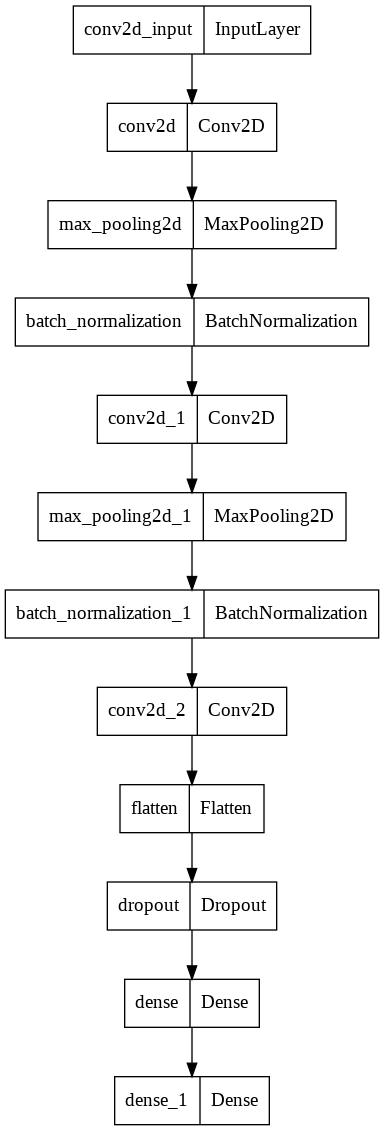

In [ ]:
plot_model(model)

In [ ]:
history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

Epoch 1/50
1407/1407 [==============================] - 18s 10ms/step - loss: 0.1896 - accuracy: 0.9437 - val_loss: 0.0780 - val_accuracy: 0.9786
Epoch 2/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0884 - accuracy: 0.9764 - val_loss: 0.0661 - val_accuracy: 0.9855
Epoch 3/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0778 - accuracy: 0.9804 - val_loss: 0.0645 - val_accuracy: 0.9851
Epoch 4/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0714 - accuracy: 0.9822 - val_loss: 0.0638 - val_accuracy: 0.9861
Epoch 5/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0665 - accuracy: 0.9838 - val_loss: 0.0540 - val_accuracy: 0.9861
Epoch 6/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0606 - accuracy: 0.9854 - val_loss: 0.0569 - val_accuracy: 0.9895
Epoch 7/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0573 - accuracy: 0.9864 - val_loss: 0.0648 - val_accurac

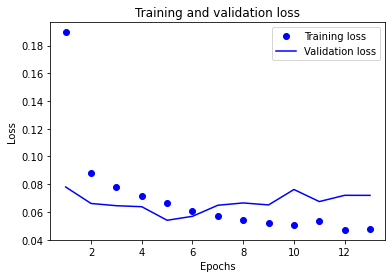

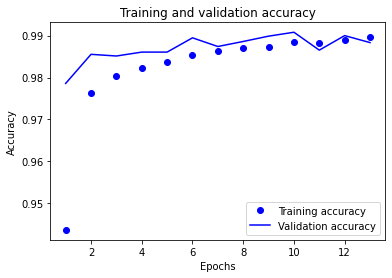

In [ ]:
plot_history()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9921
test_acc: 0.9921000003814697
